# Titanic survival prediction

In [904]:
# import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split

## 1. read and explore data

In [905]:
# import data
train = pd.read_csv("/Users/ruochenshen/Documents/kaggle/titanic/train.csv")
test = pd.read_csv("/Users/ruochenshen/Documents/kaggle/titanic/test.csv")

In [906]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [907]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [908]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [909]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [910]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. analyze data

In [911]:
#analyze numerical and categorical columns seperately
train_num = train[["Age", "SibSp", "Parch", "Fare"]]
train_cat = train[["Sex", "Pclass", "Embarked"]]

###  plot the distribution of numerical variables

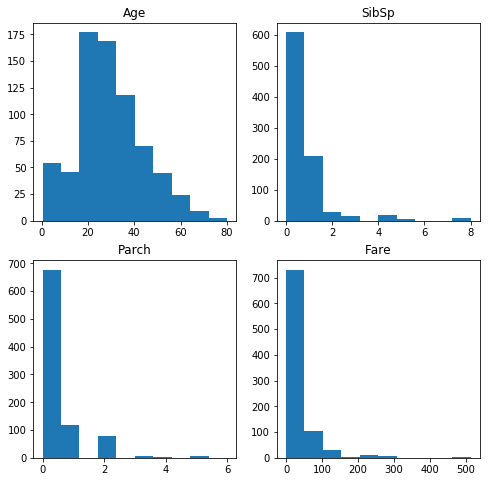

In [912]:
fig, axs = plt.subplots(2, 2, figsize = [8, 8])
for ax, i in zip(axs.flat, train_num.columns):
    ax.hist(train_num[i].dropna())
    ax.set_title(i)

### check the correlationship between numerical columns

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


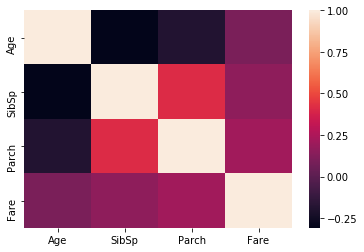

In [913]:
print(train_num.corr())
sns.heatmap(train_num.corr())

It seems there is no obvious relationship between those variables.

### compare mean values of numerical columns between survived and non-survived people

In [914]:
pd.pivot_table(train, index = "Survived", values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


It's clear that people who bought more expensive fares are more possible to survive.

### plot the distribution of categorical values

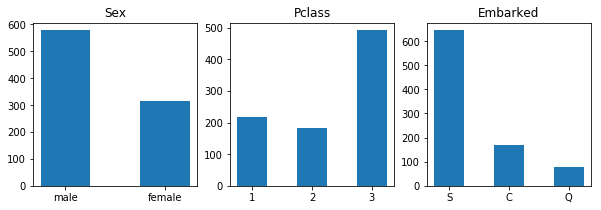

In [915]:
fig, axs = plt.subplots(1, 3, figsize = [10, 3])
for ax, i in zip(axs.flat, train_cat.columns):
    ax.bar(train_cat[i].value_counts().index, train_cat[i].value_counts(), width = 0.5)
    ax.set_title(i)

## understand relationships between survival and categorical variables

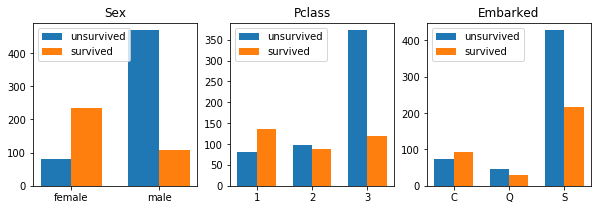

In [916]:

unsurvived = train.loc[train["Survived"] == 0]
survived = train.loc[train["Survived"] == 1]
barWidth = 0.35
fig, axs = plt.subplots(1, 3, figsize = [10, 3])

for ax, i in zip(axs.flat, train_cat.columns):
    bar1 = np.arange(len(unsurvived.groupby(unsurvived[i]).count()))
    bar2 = [x + barWidth for x in bar1]
    ax.bar(bar1, unsurvived.groupby(unsurvived[i]).count()["PassengerId"], width = barWidth, label = "unsurvived")
    ax.bar(bar2, survived.groupby(survived[i]).count()["PassengerId"], width = barWidth, label = "survived")
    ax.set_title(i)
    ax.legend(loc = 2)
    plt.sca(ax)
    plt.xticks([r + 0.5 * barWidth for r in range(len(bar1))], unsurvived.groupby(unsurvived[i]).count().index.tolist())
    

1. Female have more chance to survive;
2. People in class 1 have the most chance to survive, while people in class 3 have the least chance to survive;
3. People embarked from port C have the most chance to survive, while people embarked from port S have the least chance to survive.

## 3. Preprocess data 

### check missing value

In [917]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [918]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


1. Most of "Cabin" data is missing, so I will just delete this column;
2. "Age" data is partialy missing in both train and test data, I will impute them according to the data we have;
3. one record of "Fare" data is missing in test data, I will impute it by using the mean "Fare" value in the same Pclass;
4. Only 2 records of "Embarked" data are missing, and it's hard to impute, so I will just delete those 2 records.

### drop rows with null "Embarked"

In [919]:
train = train.dropna(subset = ["Embarked"])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


### impute missing values of "Age"

In [920]:
# I will extract a "Title" for each passenger according to thier name, and then impute the missing "Age" 
# according to their titles.

In [921]:
# extract "Title" according to "Name"
all_data = [train, test]
train["Title"] = train["Name"].str.extract("([A-Za-z]+\.)", expand = False)
test["Title"] = test["Name"].str.extract("([A-Za-z]+\.)", expand = False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [922]:
train["Title"].value_counts()

Mr.          517
Miss.        181
Mrs.         124
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Sir.           1
Ms.            1
Don.           1
Mme.           1
Jonkheer.      1
Lady.          1
Capt.          1
Countess.      1
Name: Title, dtype: int64

In [923]:
test["Title"].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Dona.        1
Dr.          1
Ms.          1
Name: Title, dtype: int64

In [924]:
# Group titles into more general clusters
for dataset in all_data:
    dataset["Title"] = dataset["Title"].replace(["Miss.", "Lady.", "Ms."], "Miss.")
    dataset["Title"] = dataset["Title"].replace(["Mr.", "Sir."], "Mr.")
    dataset["Title"] = dataset["Title"].replace(["Dr.", "Rev.", "Col.", "Major.", "Mlle.", "Don.", "Countess.", 
                                                 "Capt.", "Mme.", "Jonkheer.", "Dona."], "Other")

In [925]:
train["Title"].value_counts()

Mr.        518
Miss.      183
Mrs.       124
Master.     40
Other       24
Name: Title, dtype: int64

In [926]:
test["Title"].value_counts()

Mr.        240
Miss.       79
Mrs.        72
Master.     21
Other        6
Name: Title, dtype: int64

In [927]:
# get the mean "Age" value for each "Title" group
pd.pivot_table(train, index = ["Title"], values = ["Age"], aggfunc = np.mean)

,Age
Title,
Master.,4.574167
Miss.,21.884354
Mr.,32.409774
Mrs.,35.654206
Other,42.478261


In [928]:
# fill missing "Age" by using mean age value in the same "Title" group
age_map = {"Master.":5, "Miss.":22, "Mr.":32, "Mrs.":36, "Other":42 }
for dataset in all_data:
    dataset.loc[dataset["Age"].isna(), "Age"] = dataset.loc[dataset["Age"].isna(), "Title"].map(age_map)

In [929]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [930]:
# Divide "Age" into 4 groups
train["AgeCate"] = pd.qcut(train["Age"], 4, labels = [1, 2, 3, 4])
test["AgeCate"] = pd.qcut(test["Age"], 4, labels = [1, 2, 3, 4])
train = train.drop(["Age"], axis = 1)
test = test.drop(["Age"], axis = 1)

In [931]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCate
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Mrs.,4
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Mrs.,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Mr.,3


### impute missing values of "Fare"

In [932]:
# get the mean value of fares group by Pclass
pd.pivot_table(train, index = ["Pclass"], values = ["Fare"], aggfunc = np.mean)

,Fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


In [933]:
# impute the missing "Fare" values by using the mean value of fares in the same Pclass
fare_map = {1:84, 2:20, 3:13}
test.loc[test["Fare"].isna(), "Fare"] = test.loc[test["Fare"].isna(), "Pclass"].map(fare_map)

In [934]:
# Divide "Fare" into 4 groups
train["FareCate"] = pd.qcut(train["Fare"], 4, labels = [1, 2, 3, 4])
test["FareCate"] = pd.qcut(test["Fare"], 4, labels = [1, 2, 3, 4])
train = train.drop(["Fare"], axis = 1)
test = test.drop(["Fare"], axis = 1)

In [935]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Title,AgeCate,FareCate
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,S,Mr.,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C,Mrs.,4,4
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,NaN,S,Miss.,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S,Mrs.,3,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,NaN,S,Mr.,3,2


### delete unnecessary columns("PassengerID", "Name" , "Ticket" and "Cabin")

"PassengerID", "Name" and "Ticket" are not important for predicting survival, while "Cabin" has too many missing values, so I will just delete those columns.

In [936]:
# build a function to delete columns
def dropColumn(dataframe):
    dataframe = dataframe.drop(["PassengerId", "Name", "Ticket","Cabin"], axis = 1)
    return dataframe

In [937]:
train = dropColumn(train)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeCate,FareCate
0,0,3,male,1,0,S,Mr.,1,1
1,1,1,female,1,0,C,Mrs.,4,4
2,1,3,female,0,0,S,Miss.,2,2
3,1,1,female,1,0,S,Mrs.,3,4
4,0,3,male,0,0,S,Mr.,3,2


In [938]:
test = dropColumn(test)
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeCate,FareCate
0,3,male,0,0,Q,Mr.,3,1
1,3,female,1,0,S,Mrs.,4,1
2,2,male,0,0,Q,Mr.,4,2
3,3,male,0,0,S,Mr.,2,2
4,3,female,1,1,S,Mrs.,1,2


### Label categorical columns( "Sex", " Embarked" and "Title") 

In [939]:
# rearrange the order of columns in train dataset
train = train[["Pclass", "Sex", "AgeCate", "SibSp", "Parch", "FareCate", "Embarked", "Title", "Survived"]]
test = test[["Pclass", "Sex", "AgeCate", "SibSp", "Parch", "FareCate", "Embarked", "Title"]]

In [940]:
le = LabelEncoder()

In [941]:
# build a function to encode categorical columns in train and test set
def labelEncode(col):
    le.fit(train.iloc[:,col])
    train.iloc[:,col] = le.transform(train.iloc[:,col])
    test.iloc[:,col] = le.transform(test.iloc[:,col])

In [942]:
train.head()

,Pclass,Sex,AgeCate,SibSp,Parch,FareCate,Embarked,Title,Survived
0,3,male,1,1,0,1,S,Mr.,0
1,1,female,4,1,0,4,C,Mrs.,1
2,3,female,2,0,0,2,S,Miss.,1
3,1,female,3,1,0,4,S,Mrs.,1
4,3,male,3,0,0,2,S,Mr.,0


In [943]:
test.head()

,Pclass,Sex,AgeCate,SibSp,Parch,FareCate,Embarked,Title
0,3,male,3,0,0,1,Q,Mr.
1,3,female,4,1,0,1,S,Mrs.
2,2,male,4,0,0,2,Q,Mr.
3,3,male,2,0,0,2,S,Mr.
4,3,female,1,1,1,2,S,Mrs.


In [944]:
# encode "Sex", " Embarked" and "Title"
for i in [1, 6, 7]:
    labelEncode(i)

In [945]:
train.head()

,Pclass,Sex,AgeCate,SibSp,Parch,FareCate,Embarked,Title,Survived
0,3,1,1,1,0,1,2,2,0
1,1,0,4,1,0,4,0,3,1
2,3,0,2,0,0,2,2,1,1
3,1,0,3,1,0,4,2,3,1
4,3,1,3,0,0,2,2,2,0


In [946]:
test.head()

,Pclass,Sex,AgeCate,SibSp,Parch,FareCate,Embarked,Title
0,3,1,3,0,0,1,1,2
1,3,0,4,1,0,1,2,3
2,2,1,4,0,0,2,1,2
3,3,1,2,0,0,2,2,2
4,3,0,1,1,1,2,2,3


## Build models

In [947]:
# seperate the train dataset into feature matrix and response vector.
x = train[["Pclass", "Sex", "AgeCate", "SibSp", "Parch", "FareCate", "Embarked", "Title"]].values
x[0:5]

array([[3, 1, 1, 1, 0, 1, 2, 2],
       [1, 0, 4, 1, 0, 4, 0, 3],
       [3, 0, 2, 0, 0, 2, 2, 1],
       [1, 0, 3, 1, 0, 4, 2, 3],
       [3, 1, 3, 0, 0, 2, 2, 2]], dtype=object)

In [948]:
y = train["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [949]:
# train/test split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [950]:
# Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.
print(x_trainset.shape)
print(y_trainset.shape)
print(x_testset.shape)
print(y_testset.shape)

(622, 8)
(622,)
(267, 8)
(267,)


### decision tree classifier

In [951]:
from sklearn.tree import DecisionTreeClassifier
Ds = 10
mean_acc = np.zeros((Ds-1))
for d in range(1, Ds):
    surviveTree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    surviveTree.fit(x_trainset,y_trainset)
    predTree = surviveTree.predict(x_testset)
    mean_acc[d-1] = round(metrics.accuracy_score(y_testset, predTree), 2)

print("The best accuracy is {}".format(np.max(mean_acc)))
print("depth = {}".format(mean_acc.argmax()+1))

The best accuracy is 0.81
depth = 4


### K-Nearest Neighbors

In [952]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_trainset,y_trainset)
    yhat=neigh.predict(x_testset)
    mean_acc[n-1] = round(metrics.accuracy_score(y_testset, yhat), 2)

print("The best accuracy is {}".format(np.max(mean_acc)))
print("K = {}".format(mean_acc.argmax()+1))

The best accuracy is 0.8
K = 8


### Logistic Regression

In [953]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x_trainset,y_trainset)
yhat = LR.predict(x_testset)

print("LogisticRegression's Accuracy: ", round(metrics.accuracy_score(y_testset, yhat), 2))

LogisticRegression's Accuracy:  0.76


### Support Vector Machines

In [954]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_trainset,y_trainset)
yhat = clf.predict(x_testset)
print("SVM's Accuracy: ", round(metrics.accuracy_score(y_testset, yhat), 2))

SVM's Accuracy:  0.82


### Random Forest

In [955]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_trainset,y_trainset)
y_pred = randomforest.predict(x_testset)
print("Random Forest's Accuracy: ", round(metrics.accuracy_score(y_testset, y_pred), 2))

Random Forest's Accuracy:  0.81


### Gradient Boosting Classifier

In [956]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_trainset,y_trainset)
y_pred = gbk.predict(x_testset)
print("GBC's Accuracy: ", round(metrics.accuracy_score(y_testset, y_pred), 2))

GBC's Accuracy:  0.82


By comparing accuracies of different models, we can see Gradient Boosting Classifier is the best with accuracy rate of 0.82, so I will use it to do prediction.

## Make prediction

In [957]:
test.head()

,Pclass,Sex,AgeCate,SibSp,Parch,FareCate,Embarked,Title
0,3,1,3,0,0,1,1,2
1,3,0,4,1,0,1,2,3
2,2,1,4,0,0,2,1,2
3,3,1,2,0,0,2,2,2
4,3,0,1,1,1,2,2,3


In [958]:
# make prediction using the GBC model
test_pred = gbk.predict(test)
# add prediction result to the test dataset
test["Survival"] = test_pred.tolist()
# save prediction result to csv file
test.to_csv('/Users/ruochenshen/Documents/kaggle/titanic/titanic_prediction.csv', index=False)